In [ ]:
import pandas as pd

In [ ]:
!dir

 Volume in drive C is OS
 Volume Serial Number is 82E5-B775

 Directory of C:\Users\Asus

06/29/2020  09:30 PM    <DIR>          .
06/29/2020  09:30 PM    <DIR>          ..
09/27/2019  09:03 PM    <DIR>          .android
06/09/2020  03:01 PM    <DIR>          .idlerc
06/29/2020  07:19 PM    <DIR>          .ipynb_checkpoints
06/15/2020  05:33 PM    <DIR>          .ipython
06/15/2020  05:56 PM    <DIR>          .jupyter
06/28/2020  06:03 PM    <DIR>          .keras
11/20/2018  12:13 PM    <DIR>          .LINE
06/28/2020  04:30 PM    <DIR>          .matplotlib
02/09/2019  04:03 PM    <DIR>          .Origin
11/20/2018  12:13 PM    <DIR>          .QtWebEngineProcess
06/11/2020  12:29 PM    <DIR>          3D Objects
06/25/2020  07:01 PM             9,370 Coba 1.ipynb
06/29/2020  09:30 PM            27,965 Coba Malaria.ipynb
06/11/2020  12:29 PM    <DIR>          Contacts
10/14/2018  06:23 PM    <DIR>          Creative Cloud Files
09/27/2019  09:03 PM               298 d4ac4633ebd6440fa397b84

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#membaca file test dan train

In [ ]:
X_train  = train.drop(['label'],axis=1).values
y_train  = train['label'].values

X_test  = test.drop(['label'],axis=1).values
y_test  = test['label'].values
#axis=1 berarti menghapus sepanjang kolom yang dimaksud

In [ ]:
X_test.shape, y_test.shape
#mengecek panjang array dari dimensi X test dan Y test

((5512, 2500), (5512,))

In [ ]:
X_train.shape, y_train.shape
#mengecek panjang array dari dimensi X train dan Y train

((22046, 2500), (22046,))

Parasitized


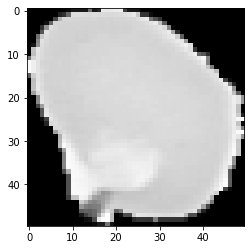

In [ ]:
import matplotlib.pyplot as plt
#library Python 2D yang dapat menghasilkan plot dengan kualitas tinggi
index = 1500
#menentukan indeks keberapa yang akan ditampilkan
plt.imshow(X_train[index].reshape(50,50),cmap='gray')
#mengubah dimensinya menjadi 50x50 dengan membuat warnanya menjadi abu abu
print(y_train[index])
#menampilkan index ke 1500 dengan dimensi menjadi 50x50 

In [ ]:
X_train = X_train.reshape(train.shape[0],50,50,1).astype('float32')
#karena menggunakan 1 chanell dengan dimensi 50x50 
#supaya diperlakukan sebagai angka floating point, bukan integer
X_train = X_train / 255.0
#untuk menormalisasi semua values di s train, karena 255 adalah maksimum value untuk semua grayscale image
#saya ingin membuat nilainya diantara 0 dan 1

X_test = X_test.reshape(test.shape[0],50,50,1).astype('float32')
X_test = X_test / 255.0

In [ ]:
from sklearn import preprocessing
#preprocessing untuk mentransformasikan data mentah menjadi data yang siap dianalisis
lb = preprocessing.LabelBinarizer()
#untuk memudahkan klasifikasi biner
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
#membuat yang tadinya string menjadi biner, jika terinfeksi 0 dan jika tidak 1

from tensorflow.keras.utils import to_categorical
#convert array dari label data menjadi vektor 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[20000]

array([0., 1.], dtype=float32)

In [ ]:
print("x_train shape", X_train.shape)
print("y_train shape", y_train.shape)
#sekedar mengecek bentuk dari x_train dan y_train
print("x_test shape", X_test.shape)
print("y_test shape", y_test.shape)

x_train shape (22046, 50, 50, 1)
y_train shape (22046, 2)
x_test shape (5512, 50, 50, 1)
y_test shape (5512, 2)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(50,50,1)))
#padding 'same' bukan 'valid' karena kita ingin ukuran input sama output sama
model.add(MaxPooling2D(pool_size=2))
#pool size 2 karena kita ingin mengurangi setengah dimensinya

model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"))
#tidak perlu input shape lagi karena tensorflow yang akan menghitungnya
#kita tidak meningkatkan karnel size karena lebih baik menggunakan filter kecil tetapi dengan networks yg lebih dalam 
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.2))
#menggunakan dropout untuk mengurangi overfitiing
model.add(Flatten())
#flatten untuk mengubah volume menjadi hanya 1 dimensi, baris, vector

model.add(Dense(200,activation='relu'))
#dense layer merupakan fully connected layer
model.add(Dropout(0.5))

model.add(Dense(2,activation='softmax'))
#untuk unit terakhir kita selalu menggunakan softmax

model.summary()
#forward path untuk membuat prediksi 
#menggunakan algoritma back propagation untuk menyesuaikan parameter

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 64)          0

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
#menggunakan algoritma sarcastic gradient descent dengan versi adam 

In [ ]:
model.fit(X_train,y_train,batch_size=50,epochs=20,verbose=1)

Epoch 1/20
441/441 [==============================] - 162s 367ms/step - loss: 0.5336 - accuracy: 0.6966
Epoch 2/20
441/441 [==============================] - 156s 354ms/step - loss: 0.1880 - accuracy: 0.9350
Epoch 3/20
441/441 [==============================] - 177s 402ms/step - loss: 0.1628 - accuracy: 0.9434
Epoch 4/20
441/441 [==============================] - 172s 390ms/step - loss: 0.1510 - accuracy: 0.9458
Epoch 5/20
441/441 [==============================] - 179s 406ms/step - loss: 0.1408 - accuracy: 0.9501
Epoch 6/20
441/441 [==============================] - 174s 395ms/step - loss: 0.1308 - accuracy: 0.9533
Epoch 7/20
441/441 [==============================] - 164s 372ms/step - loss: 0.1253 - accuracy: 0.9538
Epoch 8/20
441/441 [==============================] - 148s 334ms/step - loss: 0.1189 - accuracy: 0.9574
Epoch 9/20
441/441 [==============================] - 170s 386ms/step - loss: 0.1137 - accuracy: 0.9585
Epoch 10/20
441/441 [==============================] - 161s 365m

In [ ]:
predictions = model.evaluate(X_test,y_test)

173/173 [==============================] - 10s 57ms/step - loss: 0.1874 - accuracy: 0.9550


[Infected . Not Infected]
[0. 1.]


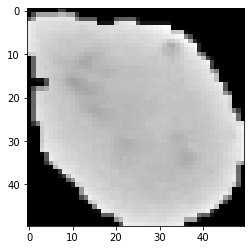

In [ ]:
index = 4000
import numpy as np
plt.imshow(X_test[index].reshape(50,50),cmap='gray')
print("[Infected . Not Infected]")
print(y_test[index])